In [61]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [69]:
#let us load the data to view it
(x_train , y_train),(x_test, y_test) = mnist.load_data()

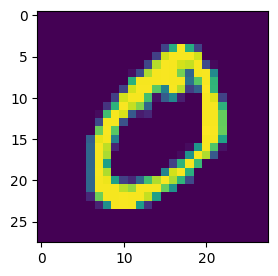

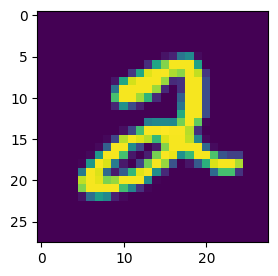

In [70]:
plt.figure(0)
plt.imshow(x_train[1])
#plt.title(f"Label : {y_train[1]}")
plt.gcf().set_size_inches(3,3) #this is same as plt.resize((30,30))
plt.figure(1)
plt.imshow(x_train[5])
#plt.title(f"Label : {y_train[5]}")
plt.gcf().set_size_inches(3,3) #this is same as plt.resize((50,50))
plt.show()


In [71]:
print(f"x_train shape: {x_train.shape}") # Should output (60000, 28, 28) 
print(f"y_train shape: {y_train.shape}") # Should output (60000,)
print(f"x_test shape: {x_test.shape}") # Should output (10000, 28, 28)
print(f"y_test shape: {y_test.shape}") # Should output (10000,)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [72]:
from keras.utils import to_categorical
#let us built the input vector from 28 * 28 pixels
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
#let us normalize the data
x_train /= 255
x_test /= 255
#as this is related to input data only hence we are only taking x train and test
#converting into one hot encoding using to_categorial
n_classes = 10 #lets  have 10 classes
#as only need to be converted to one hot encoding
y_train = to_categorical(y_train,n_classes)
y_test = to_categorical(y_test,n_classes)


In [73]:
# Verify the shapes of the converted labels
print(f"y_train shape after to_categorical: {y_train.shape}") # Should output (60000, 10) 
print(f"y_test shape after to_categorical: {y_test.shape}") # Should output (10000, 10)

y_train shape after to_categorical: (60000, 10)
y_test shape after to_categorical: (10000, 10)


In [74]:
#let us make the CNN model now
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
model = Sequential()
#let us add some layers like Conv2d and dense and dropout
model.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
##nput shape should match the dimensions of shape
model.add(MaxPool2D(pool_size = (1,1)))
model.add(Flatten()) ##Flattenn layer to squeeze the layers into 1 dimension
model.add(Dense(54, activation="relu"))
#Dense, feed-forward neural network(56 nodes, activation=”relu”) and for output softmax
model.add(Dense(10, activation="softmax"))

In [75]:
#let us validate the made model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [76]:
#let us now fit the train and test model into collection variable
collection = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8698 - loss: 0.4789 - val_accuracy: 0.9724 - val_loss: 0.0978
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9747 - loss: 0.0868 - val_accuracy: 0.9797 - val_loss: 0.0666
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9855 - loss: 0.0493 - val_accuracy: 0.9835 - val_loss: 0.0518
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9903 - loss: 0.0344 - val_accuracy: 0.9822 - val_loss: 0.0572
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9926 - loss: 0.0264 - val_accuracy: 0.9861 - val_loss: 0.0443
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9954 - loss: 0.0184 - val_accuracy: 0.9839 - val_loss: 0.0503
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9965 - loss: 0.0132 - val_accuracy: 0.9851 - val_loss: 0.0474
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9973 - loss: 0.0105 - val_ac

In [77]:
model.save("mnist_classifier_model.keras")

In [1]:
#made a very simple window
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the model
model = load_model('mnist_classifier_model.keras')

# Create the Tkinter application
root = tk.Tk()
root.title("MNIST Digit Recognizer")

# Function to load and display an image
def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path).convert('L')  # Convert to grayscale
        img = img.resize((28, 28))  # Resize to 28x28 pixels
        img_array = img_to_array(img) / 255.0  # Normalize
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension

        # Make a prediction
        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction, axis=1)[0]

        # Display the image and prediction
        tk_img = ImageTk.PhotoImage(img)
        img_label.config(image=tk_img)
        img_label.image = tk_img
        result_label.config(text=f"Predicted Label: {predicted_label}")

# Create UI elements
load_button = tk.Button(root, text="Load Image", command=load_image)
load_button.pack()

img_label = tk.Label(root)
img_label.pack()

result_label = tk.Label(root, text="Predicted Label: ")
result_label.pack()

# Run the application
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
